# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Complete_Data = pd.merge(mouse_metadata, study_results,how="left",on=["Mouse ID","Mouse ID"])

# Display the data table for preview
Complete_Data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [66]:
# Checking the number of mice.
Mice = Complete_Data["Mouse ID"].unique()
len(Mice)

249

In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Dupe_Mice = Complete_Data[Complete_Data.duplicated(["Mouse ID","Timepoint"])]
Dupe_Mice_ID = Dupe_Mice["Mouse ID"].unique()
Dupe_Mice_ID

array(['g989'], dtype=object)

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
Dupe_Rows = Complete_Data[Complete_Data["Mouse ID"].isin(Dupe_Mice_ID)]
Dupe_Rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Data = Complete_Data.loc[Complete_Data["Mouse ID"].isin(Dupe_Mice_ID)==False]

In [70]:
# Checking the number of mice in the clean DataFrame.
Mice = Clean_Data["Mouse ID"].unique()
Num_Mice = len(Mice)
Num_Mice

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume.
Mean_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].mean()
Median_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].median()
Var_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].var()
StDev_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].std()
SEM_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
Tumor_Vol_summary = pd.DataFrame({
    "Mean": [Mean_Tumor_Vol],
    "Median": [Median_Tumor_Vol],
    "Variance": [Var_Tumor_Vol],
    "Standard Deviation": [StDev_Tumor_Vol],
    "SEM": [SEM_Tumor_Vol]
})
Tumor_Vol_summary

,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
Mean_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Var_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
StDev_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary DataFrame.
Tumor_Vol_by_Regimen = pd.DataFrame({
    "Mean": Mean_Tumor_Regi,
    "Median": Median_Tumor_Regi,
    "Variance": Var_Tumor_Regi,
    "Standard Deviation": StDev_Tumor_Regi,
    "SEM": SEM_Tumor_Regi
})
Tumor_Vol_by_Regimen

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
Mean_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Var_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
StDev_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line.
Aggregate_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
Aggregate_Tumor_Regi

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

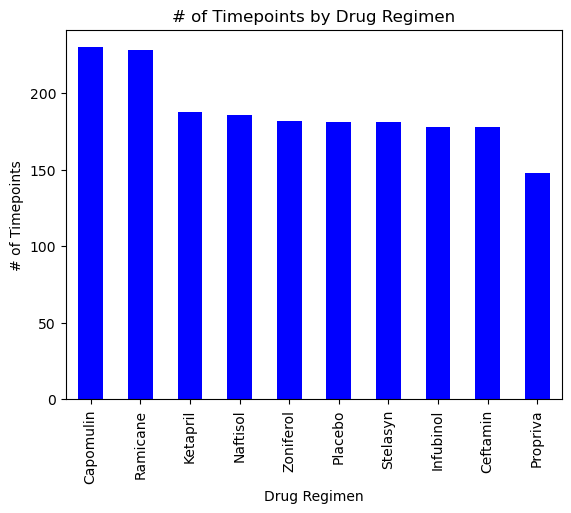

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Timepoints_by_Regi = Clean_Data["Drug Regimen"].value_counts()
Timepoints_by_Regi.plot(kind="bar",facecolor="blue")
plt.title("# of Timepoints by Drug Regimen")
plt.ylabel("# of Timepoints")
plt.xlabel("Drug Regimen")

plt.show()


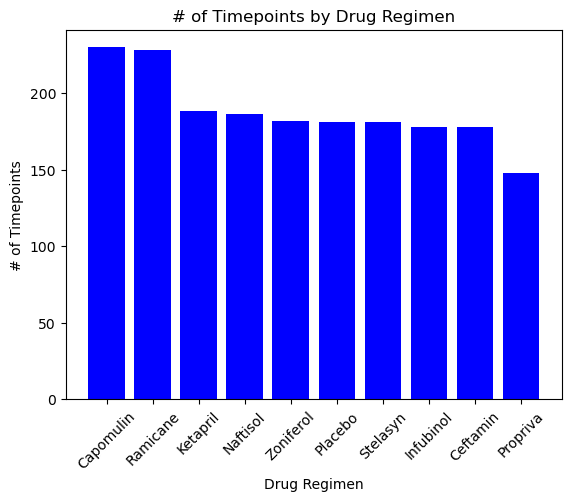

In [75]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = Clean_Data["Drug Regimen"].value_counts()
plt.bar(x_axis.index.values,x_axis.values,facecolor="blue",alpha=1,align="center")
plt.title("# of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Timepoints")
plt.xticks(rotation=45)
plt.show()


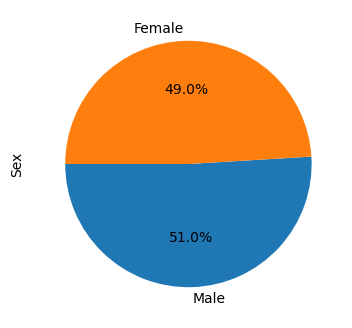

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mice_Gender = Clean_Data["Sex"].value_counts()
Mice_Gender.plot(kind="pie", figsize=(4,4), startangle=180,autopct="%1.1f%%")
plt.show()


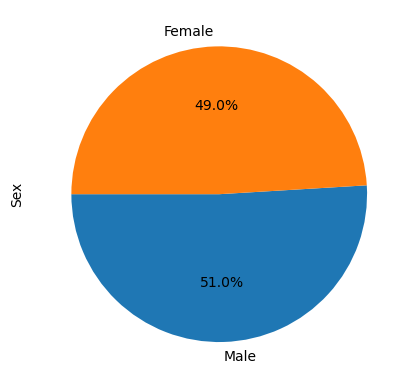

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Mice_Gender,labels=["Male","Female"],autopct="%1.1f%%",startangle=180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Final_Mice = Clean_Data.groupby(["Mouse ID"]).max()
Final_Mice_reset = per_mouse.reset_index()

Final_Tumor_Vol = Final_Mice_reset[["Mouse ID", "Timepoint"]].\
    merge(Clean_Data,on=["Mouse ID","Timepoint"],how="left")
Final_Tumor_Vol.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_List = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol_List = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Drug_List:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Final_Tumor_by_Drug = Final_Tumor_Vol.loc[Final_Tumor_Vol["Drug Regimen"]== drug,"Tumor Volume (mm3)"]
    
    # add subset 
    Tumor_Vol_List.append(Final_Tumor_by_Drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = Final_Tumor_by_Drug.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5*IQR
    upper_bound = upper_quartile + 1.5*IQR
    Outliers = Final_Tumor_by_Drug.loc[(Final_Tumor_by_Drug < lower_bound) | (Final_Tumor_by_Drug > upper_bound)]
    Outliers_Total = Outliers.count()

    print(f"{drug}'s tumor volume potential outliers are below {lower_bound} or above {upper_bound}.")
    print(f"{drug}'s IQR is {IQR} and has a total of {Outliers_Total} outliers.")
    
    

Capomulin's tumor volume potential outliers are below 20.70456164999999 or above 51.83201549.
Capomulin's IQR is 7.781863460000004 and has a total of 0 outliers.
Ramicane's tumor volume potential outliers are below 17.912664470000003 or above 54.30681135.
Ramicane's IQR is 9.098536719999998 and has a total of 0 outliers.
Infubinol's tumor volume potential outliers are below 36.83290494999999 or above 82.74144559000001.
Infubinol's IQR is 11.477135160000003 and has a total of 1 outliers.
Ceftamin's tumor volume potential outliers are below 25.355449580000002 or above 87.66645829999999.
Ceftamin's IQR is 15.577752179999997 and has a total of 0 outliers.


Text(0, 0.5, 'Tumor Volume (mm3)')

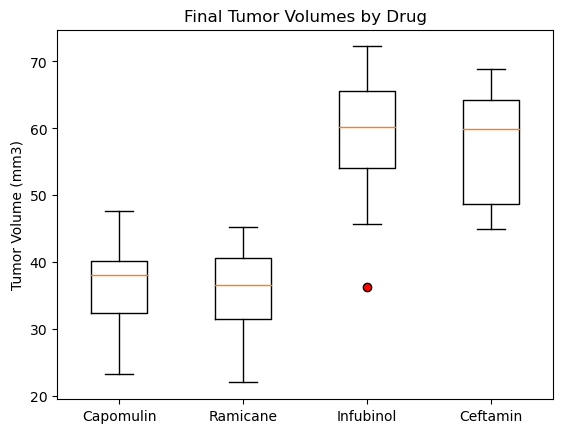

In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Outliers_Spot = dict(markerfacecolor = "red")
plt.boxplot(Tumor_Vol_List,labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops= Outliers_Spot)
plt.title("Final Tumor Volumes by Drug")
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (days)')

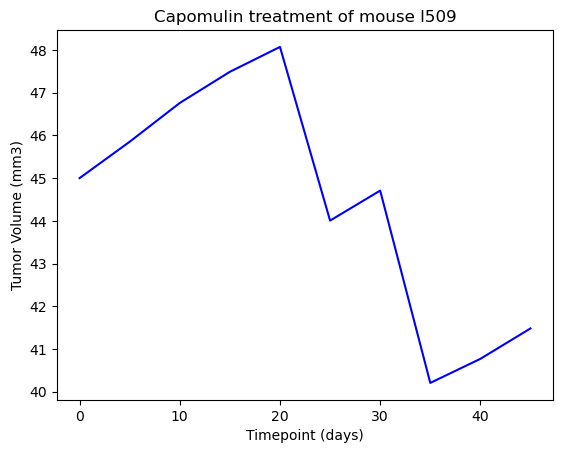

In [91]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = Clean_Data.loc[Clean_Data["Drug Regimen"] == "Capomulin"]
Mouse_ID = "l509"
Mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"]==Mouse_ID]

Volume_Line_Plot = plt.plot(Mouse_df["Timepoint"],Mouse_df["Tumor Volume (mm3)"],color="blue")
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")

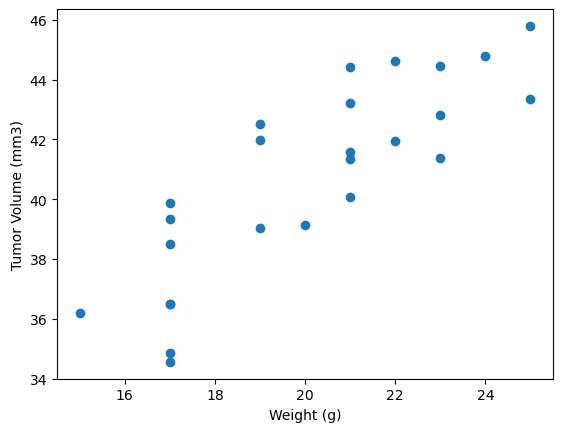

In [94]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_Avgs = Capomulin_df.groupby("Mouse ID").mean()
Avg_Weight = Capomulin_Avgs["Weight (g)"]
Avg_Tumor = Capomulin_Avgs["Tumor Volume (mm3)"]
plt.scatter(Avg_Weight,Avg_Tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84.


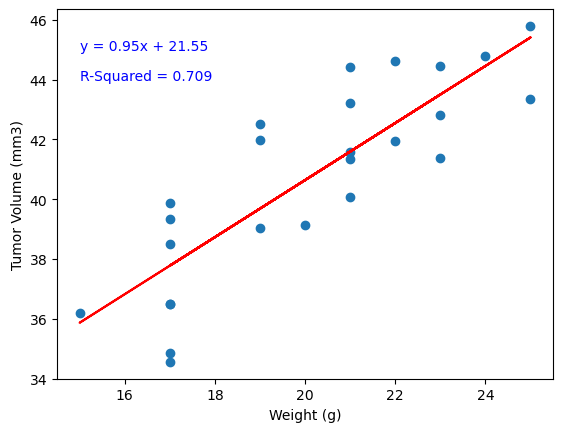

In [112]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = Avg_Weight
y_values = Avg_Tumor
correlation = round(st.pearsonr(x_values,y_values)[0],2)
print(f"The correlation between mouse weight and tumor volume is {correlation}.")

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
r_squared = round(rvalue**2,3)
regression_values = x_values*slope+intercept
Regression_Line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,color = "red",alpha=1)

plt.annotate(Regression_Line,(15,45),fontsize=10,color="blue")
plt.annotate(f"R-Squared = {r_squared}", (15,44),fontsize=10,color="blue")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
